<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_05/lab_05.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://storage.googleapis.com/kaggle-datasets-images/19/19/default-backgrounds/dataset-card.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

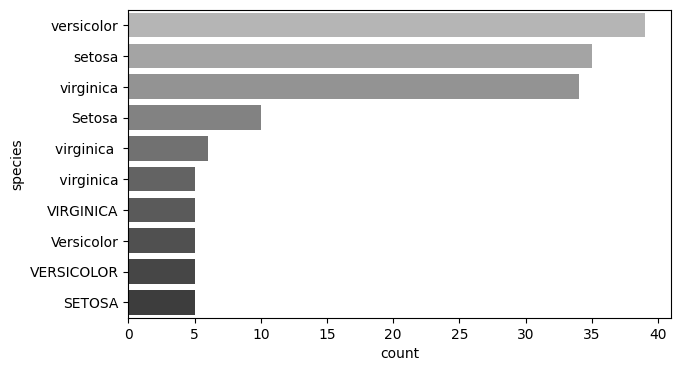

In [3]:
plt.style.use('default')
plt.figure(figsize=(7,4))

plotting = sns.countplot(
    y="species",
    data=df,
    order=df['species'].value_counts().index,
    palette="Greys_d",
    linewidth=3
)



plt.show()

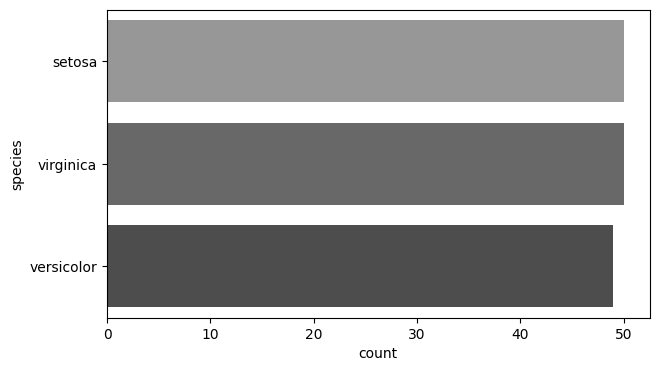

In [4]:
df["species"] = df["species"].str.lower().str.strip()
plt.style.use('default')
plt.figure(figsize=(7,4))

plotting = sns.countplot(
    y="species",
    data=df,
    order=df['species'].value_counts().index,
    palette="Greys_d",
    linewidth=3
)



plt.show()

Solo hay tres especies, que es lo esperado. Además, podemos notar que no habían datos nan en esta columna.

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

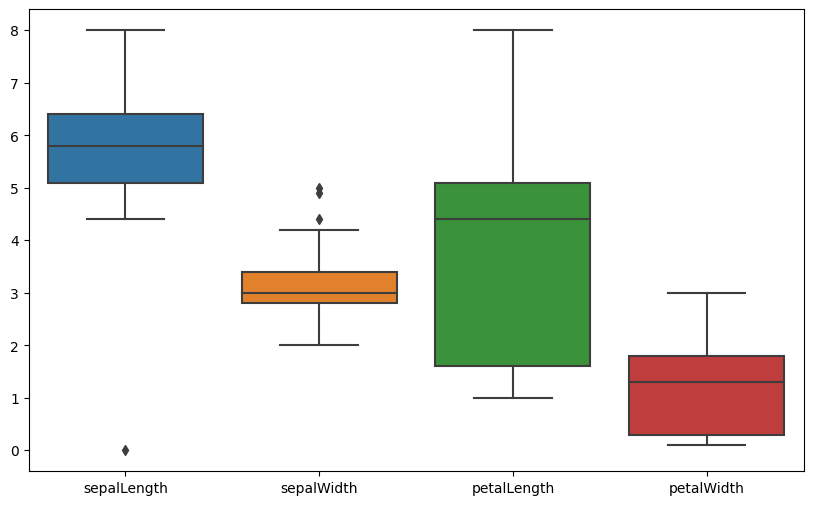

In [5]:
df.loc[df['sepalLength'].isnull(),'sepalLength'] = 0
df.loc[df['sepalLength'].isnull(),'sepalWidth'] = 0
df.loc[df['sepalLength'].isnull(),'petalLength'] = 0
df.loc[df['sepalLength'].isnull(),'petalWidth'] = 0

df_aux = df.drop(["species"],axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_aux)
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [6]:
label = []
for i in range(df.shape[0]):
  if 4<=df.iloc[i,0]<=7 and 2<=df.iloc[i,1]<=4.5 and 1<=df.iloc[i,2]<=7 and 0.1<=df.iloc[i,3]<=2.5:
    label.append("valido")
  else:
    label.append("no valido")
df["label"] = label
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,no valido
1,7.2,3.6,6.1,2.5,virginica,no valido
2,6.3,3.3,6.0,2.5,virginica,valido
3,6.7,3.3,5.7,2.5,virginica,valido
4,6.3,3.4,5.6,2.4,virginica,valido


La columna label indicará si todos los parámetros se encuentran en los rangos válidos a la vez, y no habrá una etiqueta para indicar si cada parámetro se encuentra en el rango válido. Esto pues si uno de ellos está fuera del rango, la validez del resto de los datos obtenidos en la observación es cuestionable.

4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

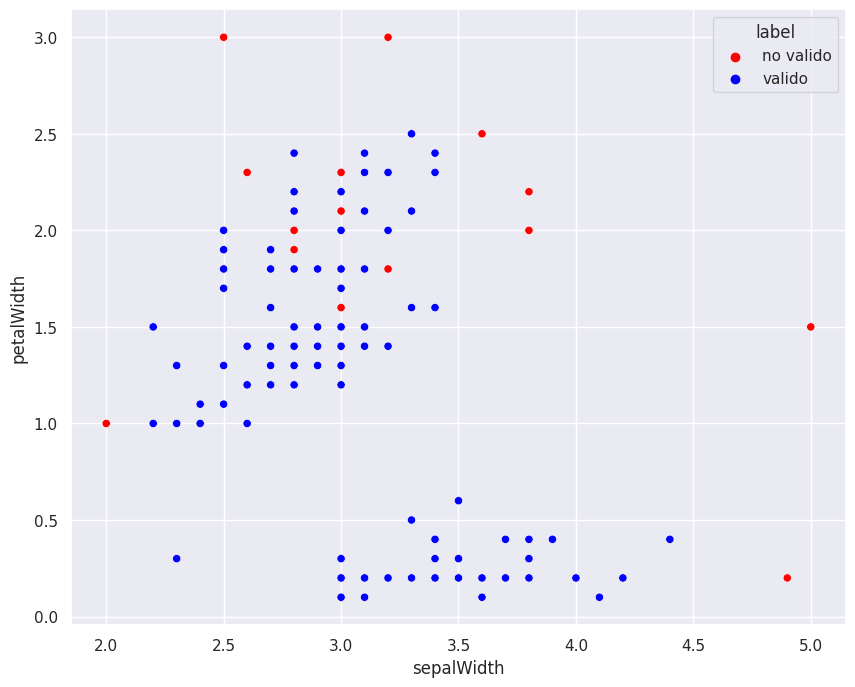

In [8]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
        y='petalWidth',
        x='sepalWidth',
        data=df,
        hue='label',
        palette = ['red','blue']
    
)
plt.show()

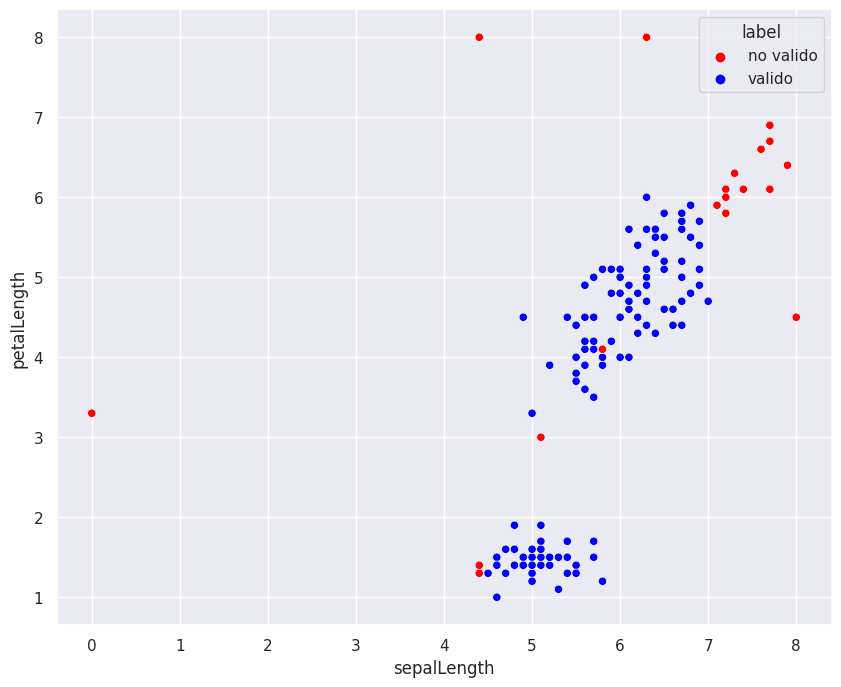

In [9]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
        y='petalLength',
        x='sepalLength',
        data=df,
        hue='label',
        palette = ['red','blue']
    
)
plt.show()

En ambos gráficos es evidente que los datos no válidos afectan en gran medida a la tendencia que puede observarse en los datos válidos. Por esta razón, se vuelve necesario filtrar los datos antes de obtener conclusiones de estos gráficos.

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

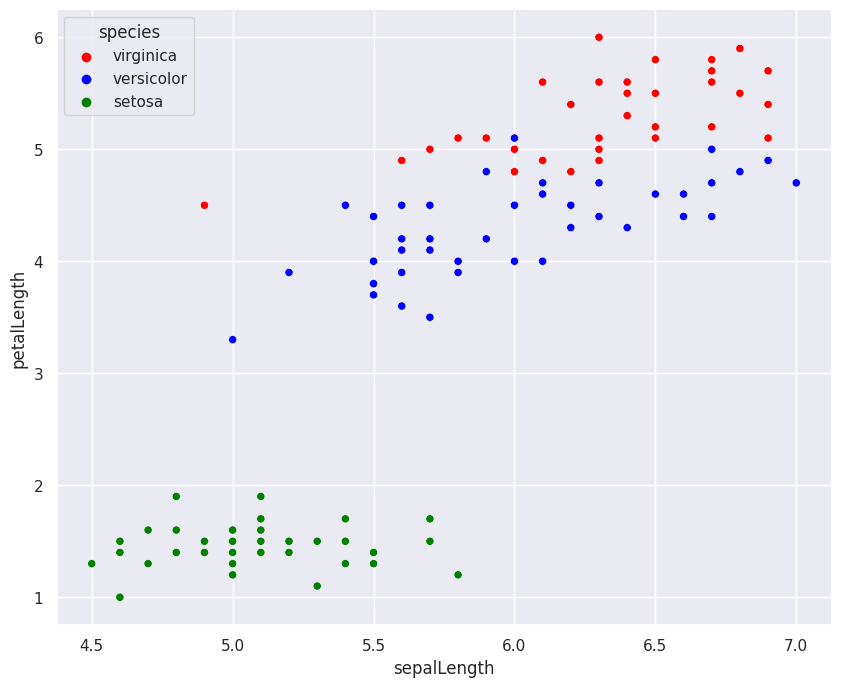

In [11]:
mask = (df["label"] == "valido")
df_limpio = df[mask]
sns.scatterplot(
        y='petalLength',
        x='sepalLength',
        data=df_limpio,
        hue='species',
        palette = ['red','blue',"green"]
    
)
plt.show()

Podemos observar que en todas las especies la tendencia general es que la longitud del sépalo no incide en la longitud del pétalo de la flor.